#  Pulsar analysis

Since pulsars are constant (for longer time scales than a second), we can use them to calibrate the monthly analysis models. There are 171 total, of which 97 are detected in at least 36 months. Of those, 31 are in all 72 months.  This analysis has these measurement objectives:

* __efficiency__   
  Characterize the detection efficiency as a function of flux
* __spectral resolution__  
  Check that the distribution of the monthly measured fluxes, compared with the value for the full 6 years, is consistent with the fitting errors. 
* __positional resolution__  
  Compare the measured positions with the known pulsar locations. This distribution would be an independent check on the fitting errors, but also a check on systematics associated with positions; since the exposure pattern differs for each month.

In [1]:
%matplotlib inline
from uw.like2.analyze import transientinfo
psrinfo=transientinfo.PSRinfo()
psrinfo.df['efficiency']=np.array(psrinfo.df.ngood/72.,float)

good sources: 29881/42912
High latitude (>10 deg) 21345
Associated 1683


## Efficiency
Make a plot of efficiency, defined by the number of months a source is detected divided by 72,  as a function of the source's energy flux.

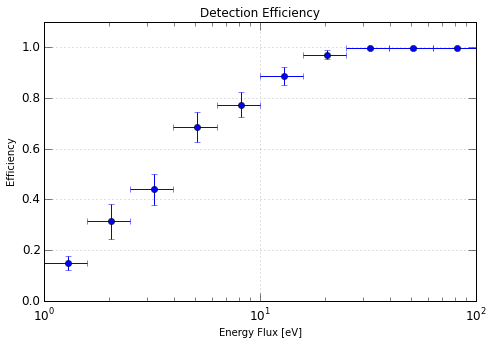

In [2]:
psrinfo.efficiency();

Detection requirements are: TS>10, locqual<8, and a<0.5.

## Flux measurement bias and resolution
For each of the detected pulsars, we examine the distribution of energy flux measurements. Recall that the spectral model for a month, exponential cutoff in the case of pulsars, has the spectral shape fixed. 

We will examine three pulsars specifically: one at 50% efficiency, a second just strong enough to be 100% efficient, and Vela.

For the next plots, we show SED plots of the weakest on: for the full 72 months, and for month 16.  

In [132]:
from IPython import display
snames=['PSR J0359+5414', 'PSR J1741-2054' ,'PSR J0835-4510'] #'PSR J0101-6422',
fnames= [s.replace(' ','_').replace('+','p') for s in snames]

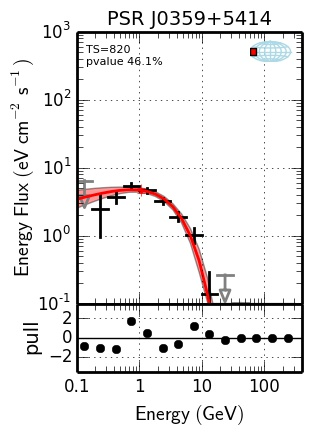

In [129]:
display.Image('../P301_6years/uw972/sedfig/%s_sed_uw972.jpg'%fnames[0], width=250)

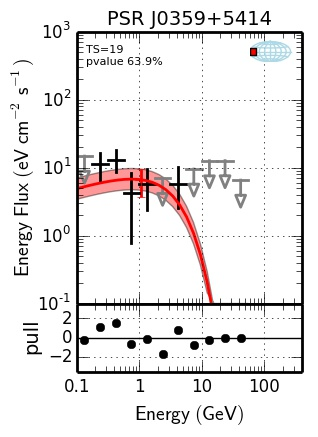

In [130]:
display.Image('month16/sedfig/%s_sed_month16.jpg'%fnames[0], width=250)

Now show a scatter plot of the mean and width of the flux measurements, both as ratios that should be 1.0.

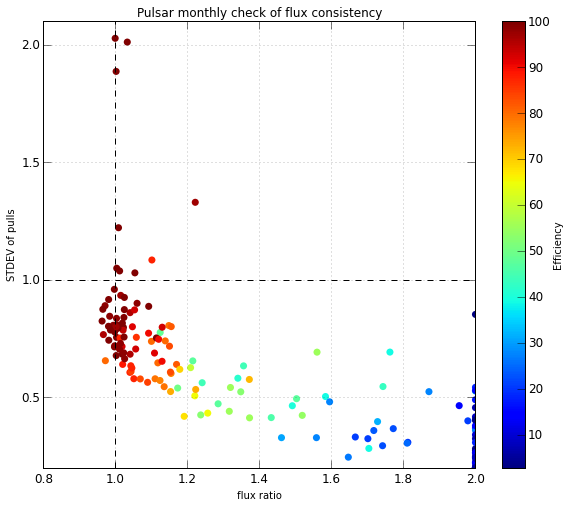

In [3]:
psrinfo.pull_plot();

This plot shows the [Malmquist bias](https://en.wikipedia.org/wiki/Malmquist_bias), a selection effect that biases estimates of the flux (or luminosity) near a detection threshold.
As you see, it overestimates the flux as soon as the efficiency is less than 1.   
  We define "pull" as the deviation of the flux from the expected, divided by the statistical uncertainty from the likelihood optimization. The standard deviation of this distribution should be 1. For moderate-strength but efficient sources, it is around 0.8, indicating that the errors are overestimated by 20%. On the other hand, very strong sources show evidence of a systematic effect. The factor for Vela, is 1.9. 
  
The following table shows the values for the three sources:

In [170]:

display.HTML('<H3>Table of flux measurements</H3>'+
    psrinfo.df.ix[snames]['ts eflux efficiency flux_ratio pull_rms '.split()
                         ].to_html(float_format=lambda x:'%.2f'%x)    )

,ts,eflux,efficiency,flux_ratio,pull_rms
PSR J0359+5414,819.75,4.63,0.50,1.17,0.54
PSR J1741-2054,7482.37,26.84,1.00,1.01,0.79
PSR J0835-4510,3492724.72,1609.40,1.00,1.00,1.89


Now show the actual distributions for these sources. The energy flux, with a line for the 6-year measurement, and the "pull", or deviation divided by error.

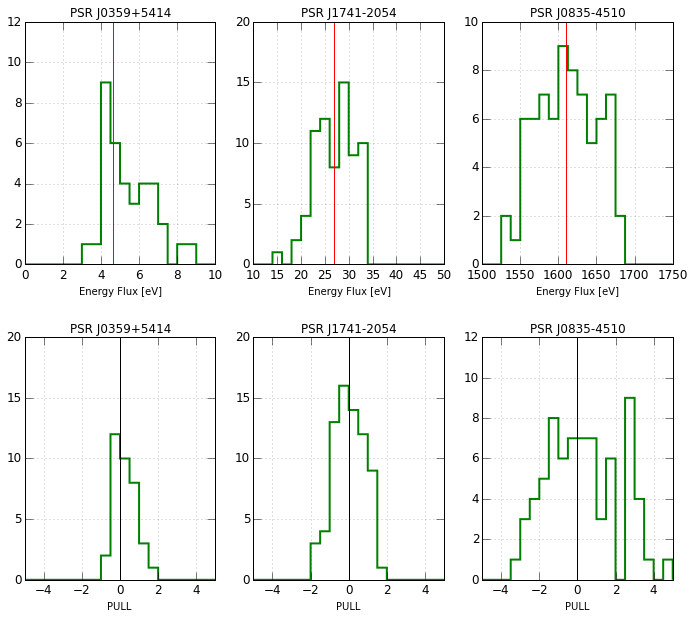

In [143]:
ncols=3
fig,axx = plt.subplots(2,ncols, figsize=(12,10))
plt.subplots_adjust(hspace=0.3)
for ax, sname, xlim, ymax in zip(axx.flatten()[:ncols], snames, 
                                 [(0,10), (10,50),(1500,1750)], (12,20,10)):
    psrinfo.psr_plots(sname, 'eflux', ax=ax, bins=np.linspace(xlim[0],xlim[1],21));
    plt.setp(ax,xlim=xlim,xscale='linear', ylim=(0,ymax),title=sname );
for ax, sname, ymax in zip(axx.flatten()[ncols:], snames,  (20,20,12)):
    psrinfo.psr_plots(sname, 'pull', ax=ax, label='PULL', bins=np.linspace(-5,5,21));
    plt.setp(ax,xlim=(-5,5), xscale='linear', ylim=(0,ymax), title=sname );
    ax.axvline(0, color='k')

## Localization resolution
The localization check that is run routinely on every source defines a function for the log likelihood as a function of the position of the source. The pattern formed by this function is fit to s double gaussian, the parameters of which define the error ellipse. A measure of the consistency of the function to this assumption is also made.  

The same function is used to measure the likelihood ratio , for the known location of the pulasar with respect to the fit position. Assuming the gaussian shape, the probabity distribution for this quantity is ${\exp}(-TS/2)$. Let $P$ and $S$ represent the positions of the pulsar and the source, respectively. Then   $TS=2{\log}(\mathscr{L}(P)/\mathscr{L}(S))$. Given the expected exponential distribution, a good measure of the exponent factor is just eh mean, which should be 2. Anything larger would represent an additional systematic.

Here is the distribution of this mean for the pulsars.

In [ ]:
ta = psrinfo.ta
reload(transientinfo)
psrinfo=transientinfo.PSRinfo(ta)

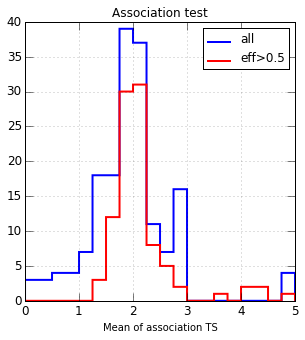

In [168]:
psrinfo.association_ts();

This is not a very sensitive way to measure this, but for most moderately strong sources, the mean appears to be close to 2.0.   
There are six with the TS>3. Here is a table:

In [171]:
df = psrinfo.df
bad=(df.ngood>36) & ((df.pull_rms>1.1) | (df.adts_mean>3))
df_bad=df[bad]['eflux ts efficiency pull_rms flux_ratio adts_mean'.split()]
display.HTML(df_bad.to_html(float_format=lambda x: '%.1f'%x)) #['PSR J0835-4510'] #.monthly

,eflux,ts,efficiency,pull_rms,flux_ratio,adts_mean
PSR J0534+2200,84.6,28174.6,1.0,0.9,1.0,4.0
PSR J0633+1746,795.6,1407476.7,1.0,2.0,1.0,4.5
PSR J0835-4510,1609.4,3492724.7,1.0,1.9,1.0,6.5
PSR J1709-4429,223.9,237372.6,1.0,1.2,1.0,3.0
PSR J1747-2958,30.3,3733.3,1.0,1.3,1.2,3.6
PSR J1809-2332,72.1,34627.5,1.0,0.9,1.0,4.2
PSR J2021+4026,123.9,81848.3,1.0,2.0,1.0,2.3


Not surprisingly, this set correlates with the very strong sources that are affected by a systematic for flux measurement.

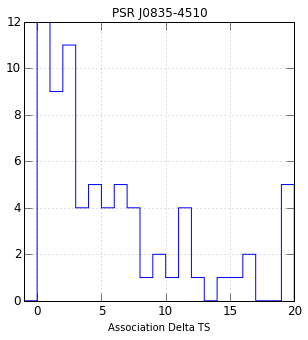

In [153]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
xlim=(-1,20)
ax.hist(np.asarray(adts,float).clip(*xlim), 
        np.linspace(xlim[0],xlim[1],22), histtype='step');
ax.grid(True, alpha=0.5)
plt.setp(ax, xlabel='Association Delta TS', xlim=xlim, title=sname);

In [ ]:
ta = psrinfo.ta
reload(transientinfo)
psrinfo=transientinfo.PSRinfo(ta)


In [92]:
t =psrinfo['PSR J0101-6422']; t

adts_max                                               10.06862
adts_mean                                              1.987922
eflux                                                  2.346132
flux_ratio                                              1.11764
mean                                                  0.1749903
monthly                    a      adeltats      aprob       ...
ngood                                                        58
nmonths                                                      72
pull_rms                                               0.646633
ts                                                     1667.328
Name: PSR J0101-6422, dtype: object

In [95]:
t.monthly.ix[16]

a              0.128008
adeltats       2.148919
aprob          0.999996
eflux          1.812986
good               True
locqual            0.98
pull         -0.5305872
relfluxunc    0.5542371
ts             19.15751
Name: 16, dtype: object